In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error


In [30]:
data = pd.read_csv('data.csv')

In [32]:
print(data.head())

   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH      

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

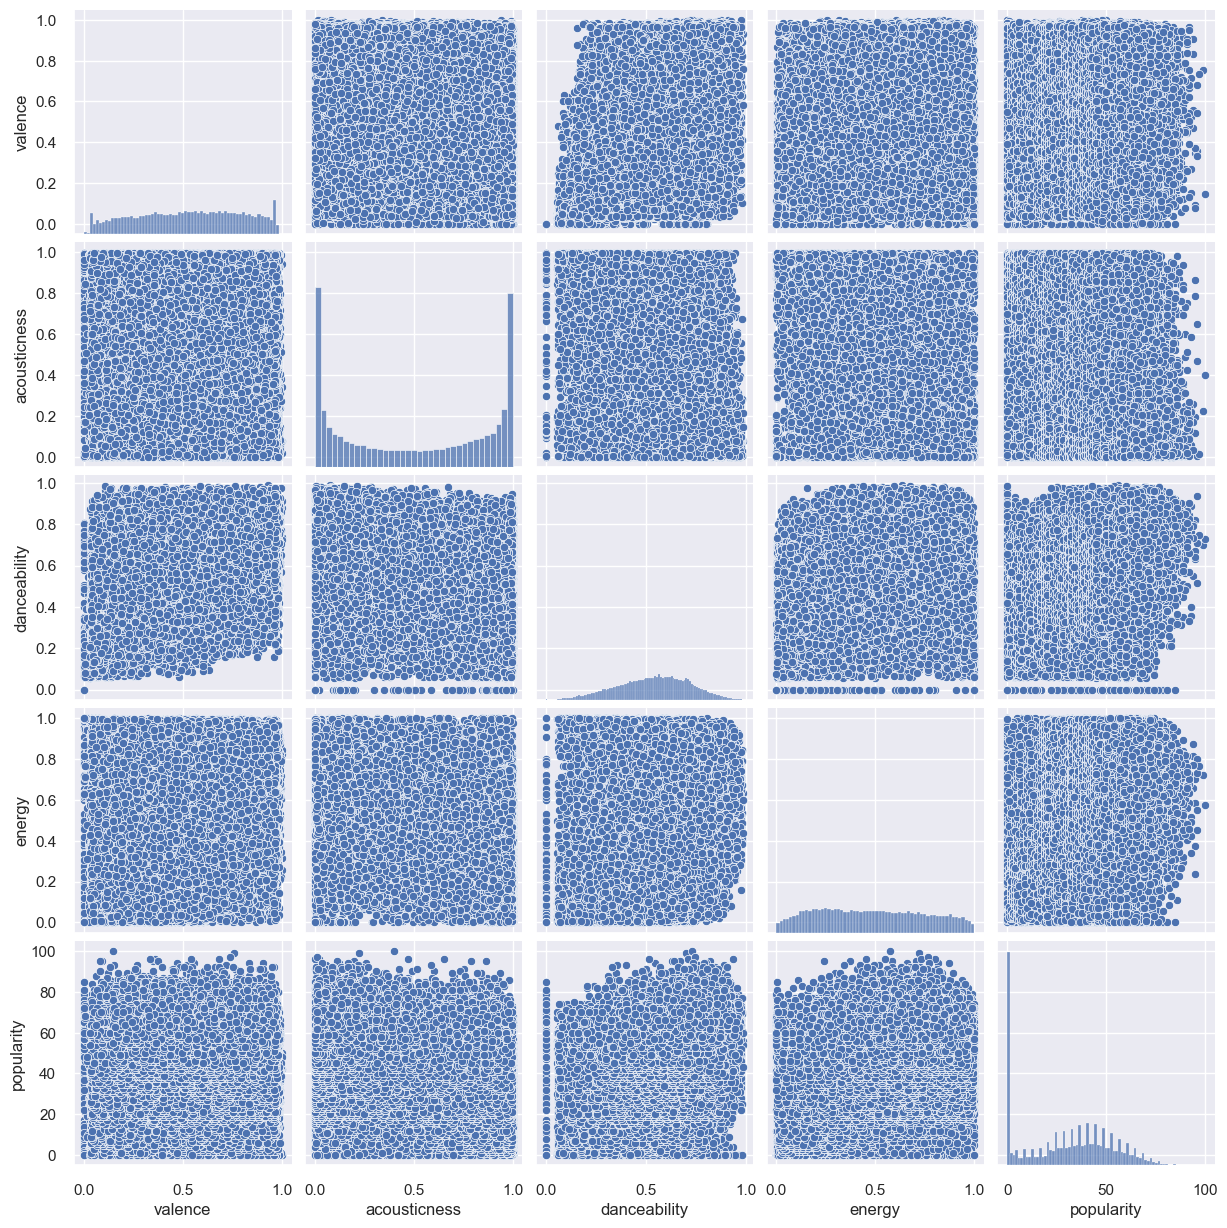

In [36]:
sns.pairplot(data[['valence', 'acousticness', 'danceability', 'energy', 'popularity']])
plt.show()

In [37]:
# Data Preprocessing
data.drop(['id', 'artists', 'name', 'release_date'], axis=1, inplace=True)
data.dropna(inplace=True)

In [38]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)


In [39]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(data_normalized, test_size=0.2, random_state=42)

In [40]:
# Model Training
knn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model.fit(X_train)

NearestNeighbors()

In [41]:
# Model Evaluation
distances, indices = knn_model.kneighbors(X_test)


In [42]:

predicted_ratings = []
for i, neighbors_idx in enumerate(indices):
    actual_ratings = X_test[i] 
    neighbor_ratings = X_train[neighbors_idx] 
    predicted_rating = np.mean(neighbor_ratings, axis=0) 
    predicted_ratings.append(predicted_rating)

mse = mean_squared_error(X_test, predicted_ratings)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.03500529788606136
